In [3]:

## Part 1: Linear Regression

import pandas as pd
import sklearn
print("Jupyter set up Complete")

Jupyter set up Complete


In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
print("All set up complete")

All set up complete


In [55]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
from sklearn.model_selection import train_test_split

In [8]:
X= df.drop('MedHouseVal', axis=1)
y= df['MedHouseVal']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Samples: ", X_train.shape[0], y_train.shape[0])
print("Testing Samples: ", X_test.shape[0], y_test.shape[0])

Training Samples:  16512 16512
Testing Samples:  4128 4128


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [15]:
print("Intercept:", model.intercept_)
print("Coefficiet:", model.coef_)
print("Feature name:", X.columns.tolist())

Intercept: -37.02327770606412
Coefficiet: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Feature name: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [20]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
sample= X_test.iloc[0]
print(sample)
sum_coef = np.sum(sample * model.coef_)
print("Sum of all coeff:",sum_coef)
print("Adding intercept:",sum_coef + model.intercept_)
model.predict([sample.to_numpy()])

MedInc           1.681200
HouseAge        25.000000
AveRooms         4.192201
AveBedrms        1.022284
Population    1392.000000
AveOccup         3.877437
Latitude        36.060000
Longitude     -119.010000
Name: 20046, dtype: float64
Sum of all coeff: 37.74240054766604
Adding intercept: 0.7191228416019158


/Users/gokulsukesan/Documents/Gks/My/Learnings/ML/AI_Transition_Month1/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.71912284])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)

mean_sq_err = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Mean sq error:", mean_sq_err)
print("R2 error:", r2)


Mean sq error: 0.5558915986952442
R2 error: 0.575787706032451


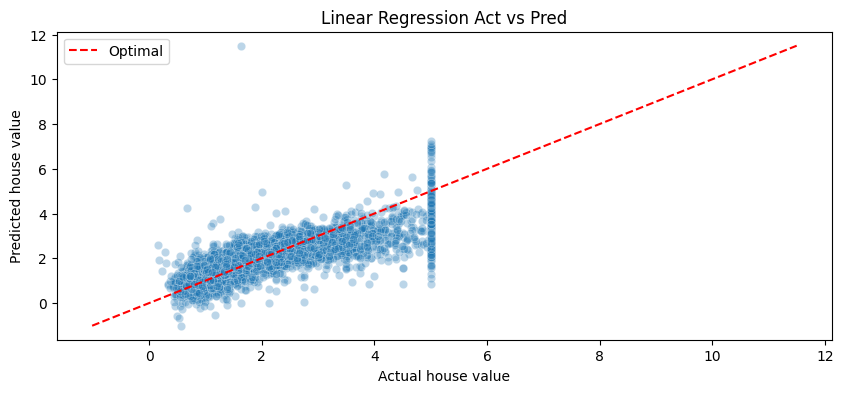

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.scatterplot(x=y_test, y=pred, alpha = .3)

lims=[ min(y_test.min(),pred.min()), max(y_test.max(), pred.max()) ]
plt.plot(lims, lims, '--', color='red', label='Optimal')

plt.xlabel("Actual house value")
plt.ylabel("Predicted house value")
plt.title("Linear Regression Act vs Pred")
plt.legend()
plt.show()

In [64]:
## Part 2: Logistic Regression

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
print(data.feature_names)
print(iris.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [61]:
data.target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
data.frame
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [95]:
from sklearn.model_selection import train_test_split
X = df[iris.feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Number of rows and columns 
print("Training sample:", X_train.shape)
print("Testing sample:", X_test.shape)

Training sample: (120, 4)
Testing sample: (30, 4)


In [96]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 200)
clf.fit(X_train, y_train)

print("Model training complete after",clf.n_iter_,"iterations") 

Model training complete after [100] iterations


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average = 'macro'))
print("Recall:", recall_score(y_test, y_pred, average = 'macro')) 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


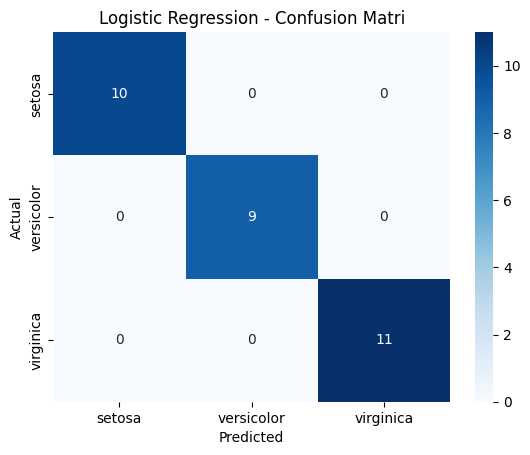

In [98]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matri")
plt.show()

In [ ]:
# Summary

### Linear Regression (Project 1 – California Housing)
- Goal: Predict median house values from numeric features.  
- Metrics: MSE = …  R² = …  
- Insights: Higher income and newer houses correlate strongly with higher values.  

### Logistic Regression (Project 2 – Iris Classification)
- Goal: Predict flower species from petal and sepal dimensions.  
- Accuracy: 100 %  
- Interpretation: Classes are linearly separable; logistic regression generalizes perfectly.  

### Key Takeaways
- Regression → continuous predictions (error-based metrics).  
- Classification → discrete predictions (accuracy-based metrics).  
- Evaluating the right metric type is critical for trustworthy results.